# Exploring further the dataset

We look at the features and their distribution to understand better the dataset

In [37]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Feature Data
filename = "features.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)

data = pd.read_csv(filepath,index_col=False, header=0)
print(len(data))
data.head()

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.965,2018.869,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,3.196,1640.310,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,4.403,1559.289,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,4.853,1299.971,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,5.357,1143.417,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


## Support function lag_data for augmenting the dataset to include seriability

We create additional columns to show the previous values (lag)

We use a window of 12 months to get the value for the same month of previous year

In [38]:


def lag_data(lag_count, df):
    features = []
    targets = []
    for i in range(1, lag_count+1):
        df['lag%s' % i] = df.Solar.shift(i)
        df['peek%s' % i] = df.Solar.shift(-1*i)
        features.append('lag%s' % i)
        targets.append('peek%s' % i)
        
    #differencing
    df['diff1'] = df.Solar.diff(1)
    return features, targets, df.iloc[lag_count:-1*lag_count] #dropped rows with nan
    
lag_count = 12
features, targets, data = lag_data(lag_count, data)

data.head(5)

,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,...,peek8,lag9,peek9,lag10,peek10,lag11,peek11,lag12,peek12,diff1
12,3.058,2137.647,1991,7.41,46.1,1,0,0,0,0,...,5.283,4.853,4.815,4.403,3.950,3.196,3.749,2.965,3.168,-0.577
13,3.296,1686.339,1991,7.61,15.9,0,1,0,0,0,...,4.815,5.357,3.950,4.853,3.749,4.403,3.168,3.196,3.415,0.238
14,4.542,1599.772,1991,7.79,38.3,0,0,1,0,0,...,3.950,5.406,3.749,5.357,3.168,4.853,3.415,4.403,4.705,1.246
15,5.006,1269.986,1991,7.98,20.1,0,0,0,1,0,...,3.749,5.675,3.168,5.406,3.415,5.357,4.705,4.853,5.185,0.464
16,5.526,1183.085,1991,8.14,30.2,0,0,0,0,1,...,3.168,5.616,3.415,5.675,4.705,5.406,5.185,5.357,5.724,0.520


New dataset now looks like

In [39]:
columns_to_review = list(data.columns)
data.columns

Index(['Solar', 'Energy', 'year', 'Price', 'REDTI', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'lag1', 'peek1', 'lag2',
       'peek2', 'lag3', 'peek3', 'lag4', 'peek4', 'lag5', 'peek5', 'lag6',
       'peek6', 'lag7', 'peek7', 'lag8', 'peek8', 'lag9', 'peek9', 'lag10',
       'peek10', 'lag11', 'peek11', 'lag12', 'peek12', 'diff1'],
      dtype='object')

## Support function for determining Feature correlation

Lets look at the heat map created over the augmented dataset

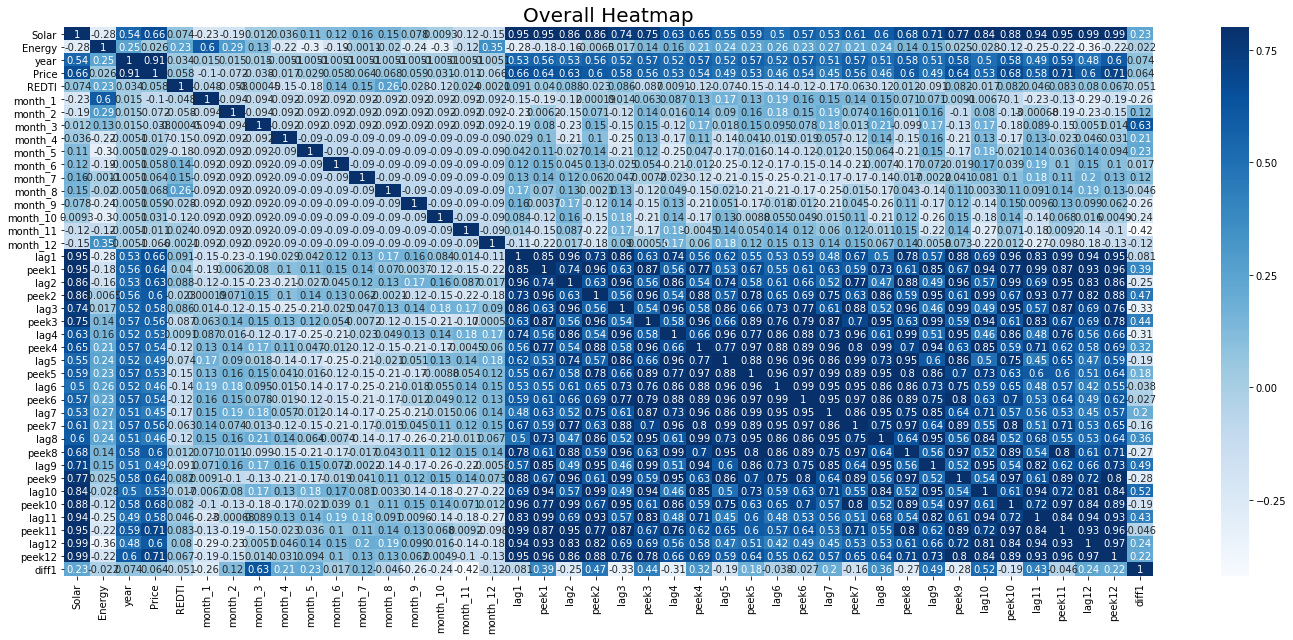

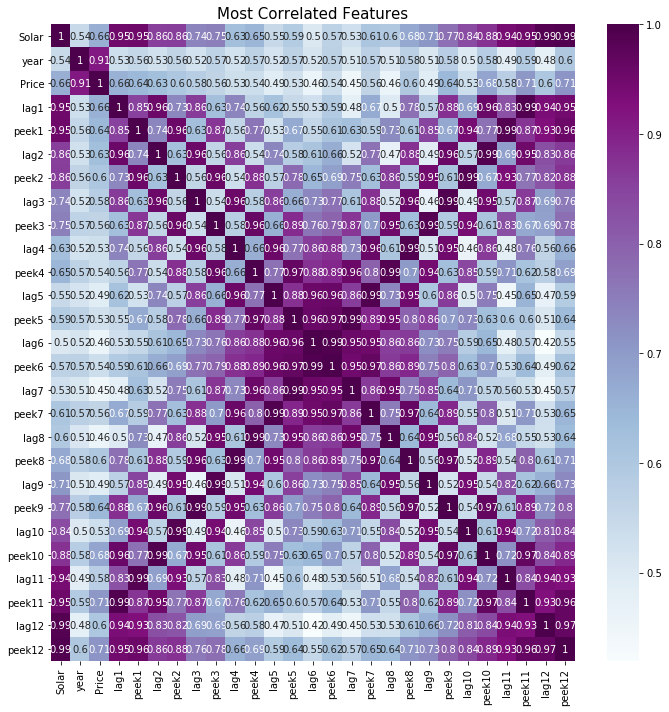

Most Correlated Features with Target Variable:

year
Price
lag1
peek1
lag2
peek2
lag3
peek3
lag4
peek4
lag5
peek5
lag6
peek6
lag7
peek7
lag8
peek8
lag9
peek9
lag10
peek10
lag11
peek11
lag12
peek12


In [40]:
def FeatureCorrelation(data, feature):
    import seaborn as sb

    # Correlation Matrix
    CMtx = data.corr()
    plt.figure(5, figsize=(20, 9))
    sb.heatmap(CMtx, vmax=0.8, annot=True, cmap='Blues')  # Heatmap
    plt.title('Overall Heatmap', fontsize=20)
    # Save our graph 
    plt.savefig("../../images/overallcorrelationheat.png")
    plt.tight_layout()
    plt.show()

    # Most Correlated Features
    MCF = CMtx.index[abs(CMtx[feature]) > 0.5]  # Features that have a correlation greater than 0.5 with the Target Variable
    plt.figure(6, figsize=(10,10))
    sb.heatmap(data[MCF].corr(), annot=True, cmap='BuPu')
    plt.title('Most Correlated Features', fontsize=15)

    # Save our graph 
    plt.tight_layout()
    plt.savefig("../../images/correlationheat.png")
    plt.show()

    # Listing
    MCFL = list(MCF)
    MCFL.remove(feature)
    print('Most Correlated Features with Target Variable:\n')
    for name in MCFL:
       print(name)

FeatureCorrelation(data, 'Solar')



Scatter Plots


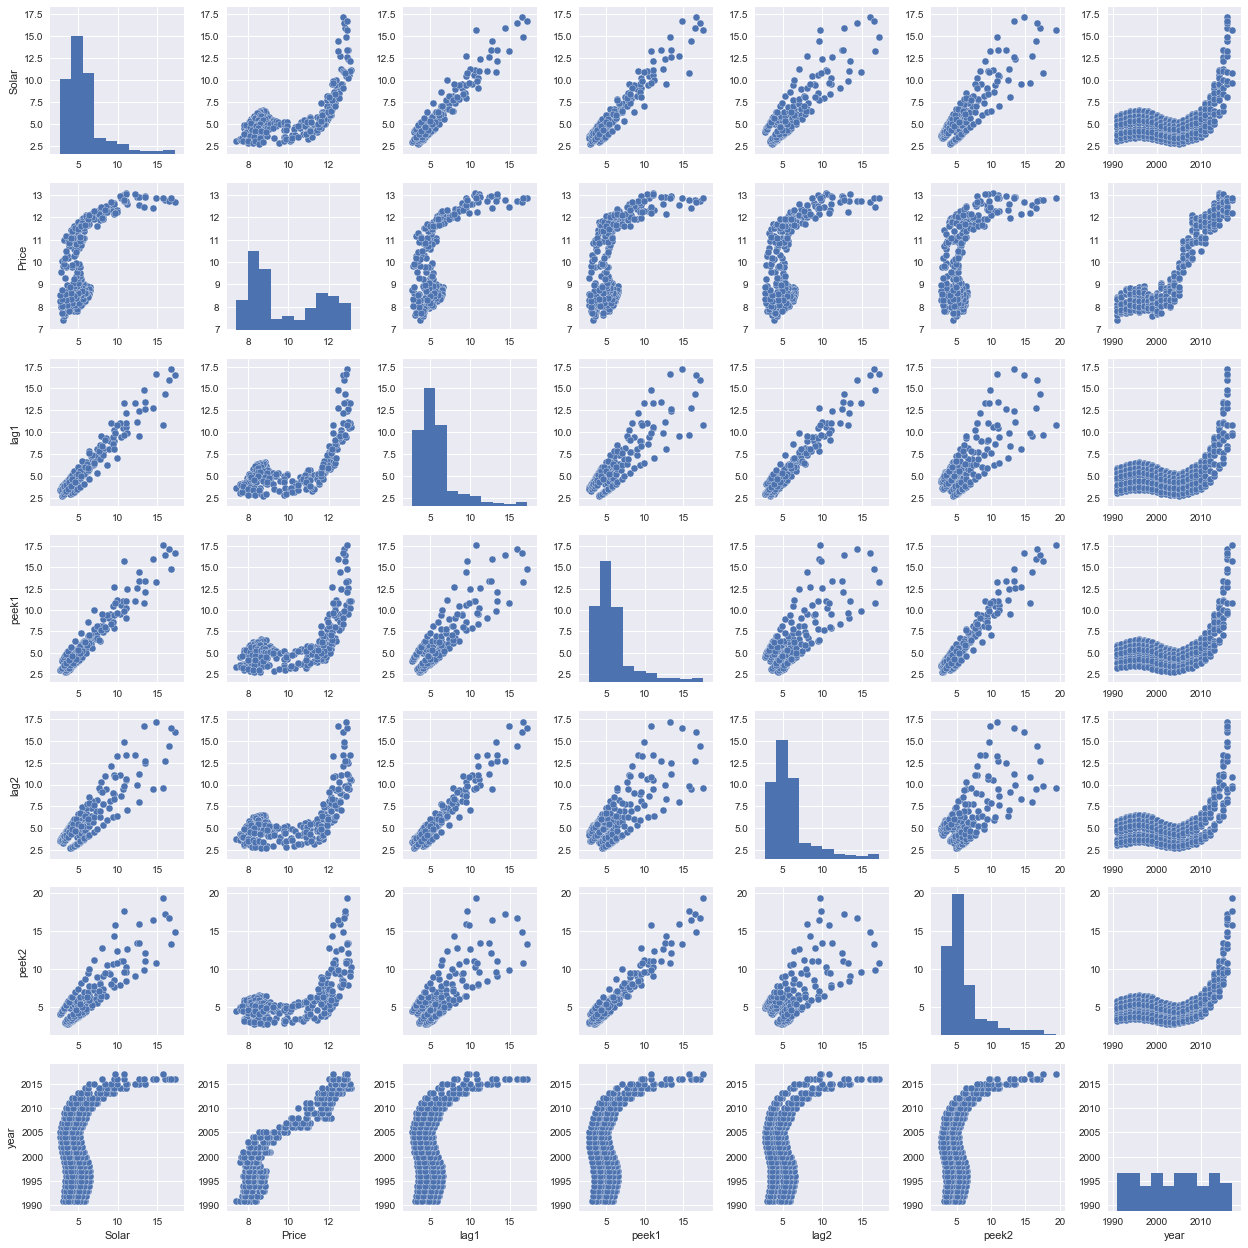

/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


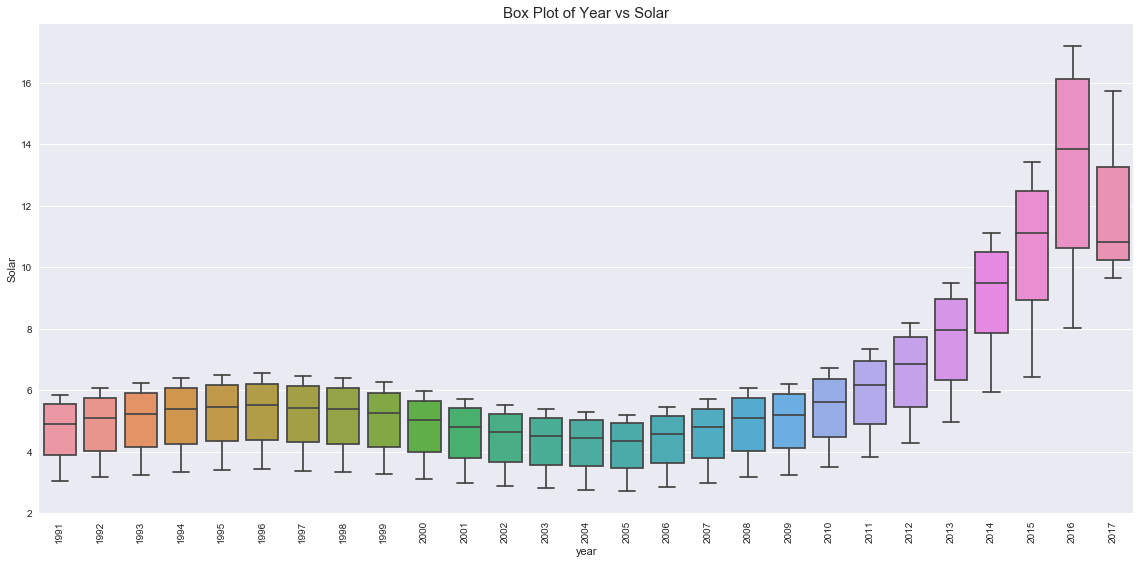

In [41]:
import seaborn as sb
# Scatter Plots between 'Solar' and Correlated Variables
print('\nScatter Plots')
sb.set()
CorF = ['Solar', 'Price', 'lag1', 'peek1', 'lag2', 'peek2', 'year']  # Partial correlated Features
sb.pairplot(data[CorF], size = 2.5)
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/normalization.png")
plt.show()

# Box Plot between 'Year' and 'Solar'
plt.figure(8, figsize=(16, 8))
sb.boxplot(x=data['year'], y=data['Solar'])
plt.xticks(rotation=90)
plt.title('Box Plot of Year vs Solar', fontsize=15)
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/boxplotyear.png")
plt.show()

## Closer look at the original dataset, by features to understand their distribution

We have support function to plot the distribution of a given feature

We plot for each original feature

In [5]:
# Stats for Feature Distribution
import scipy.stats as scst
import scipy.special as scsp
import seaborn as sb

def normalizing_feature(featurename):
    (mu, sigma) = scst.norm.fit(data[featurename])
    mu = round(mu,3)
    sigma = round(sigma,3)
    mode = data[featurename].mode().astype(int)
    print('\nmu(Mean):', mu)
    print('sigma(Standard Deviation):', sigma)
    print('Mode:', mode)

    # Skewness of Target Variable
    plt.figure(3)
    sb.distplot(data[featurename] , fit=scst.norm)
    plt.title(featurename + ' Distribution', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc='best')
    # Save our graph 
    plt.tight_layout()
    plt.savefig("../../images/Normalization_"+featurename+".png")
    plt.show()

    # Probability Plot(Similar to Quantile-Quantile Plot)
    plt.figure(4)
    scst.probplot(data[featurename], plot=plt)
    plt.show()

    # Skewness and Kurtosis
    print('Skewness: %.5f' % data[featurename].skew())
    print('Kurtosis: %.5f' % data[featurename].kurt())
                       


mu(Mean): 9.859
sigma(Standard Deviation): 1.747
Mode: 0     8
1     8
2     8
3    12
dtype: int64


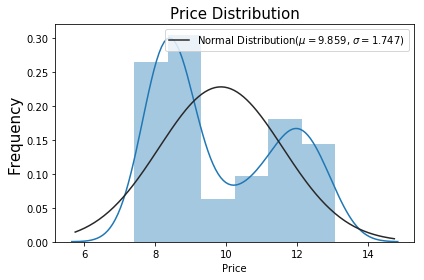

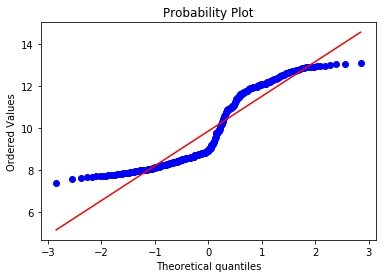

Skewness: 0.42155
Kurtosis: -1.41582


In [10]:
normalizing_feature('Price')



mu(Mean): 5.811
sigma(Standard Deviation): 2.537
Mode: 0    5
dtype: int64


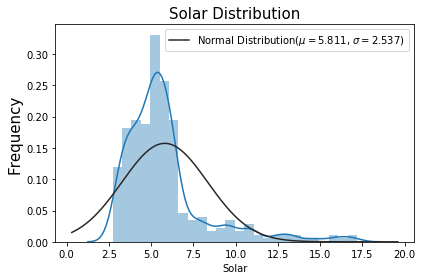

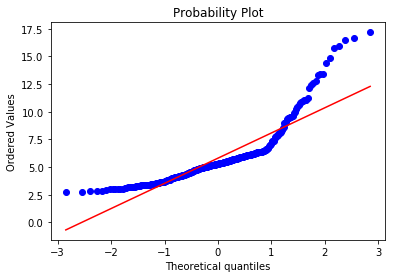

Skewness: 2.08255
Kurtosis: 5.13958


In [9]:
normalizing_feature('Solar')


mu(Mean): 5.773
sigma(Standard Deviation): 2.477
Mode: 0    5
dtype: int64


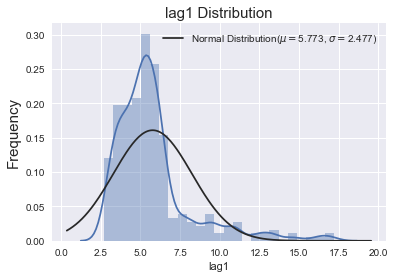

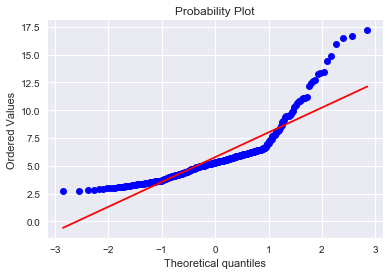

Skewness: 2.07614
Kurtosis: 5.25509


In [9]:
normalizing_feature('lag1')


mu(Mean): 5.857
sigma(Standard Deviation): 2.617
Mode: 0    5
dtype: int64


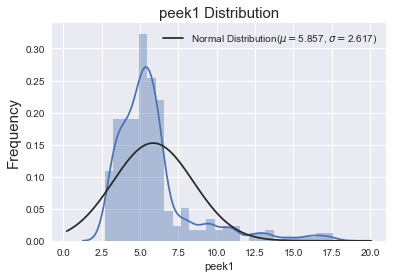

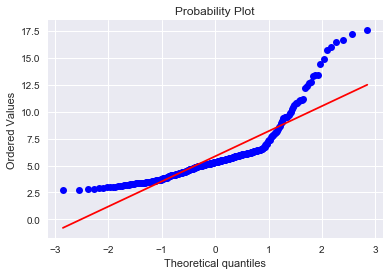

Skewness: 2.13738
Kurtosis: 5.34303


In [10]:
normalizing_feature('peek1')


mu(Mean): 5.751
sigma(Standard Deviation): 2.463
Mode: 0    5
dtype: int64


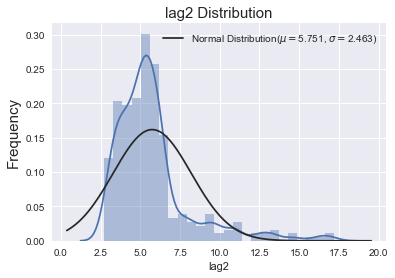

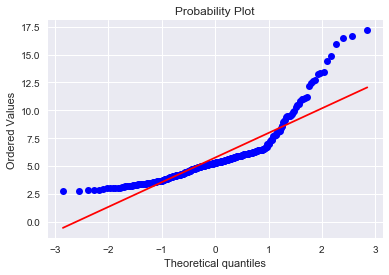

Skewness: 2.10995
Kurtosis: 5.46573


In [11]:
normalizing_feature('lag2')


mu(Mean): 5.908
sigma(Standard Deviation): 2.721
Mode: 0    5
dtype: int64


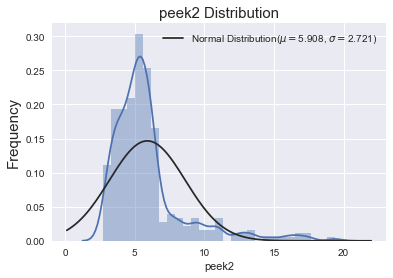

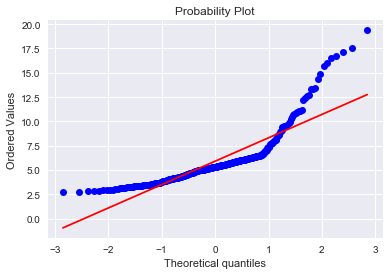

Skewness: 2.23838
Kurtosis: 5.92375


In [12]:
normalizing_feature('peek2')


mu(Mean): 5.958
sigma(Standard Deviation): 2.834
Mode: 0    5
dtype: int64


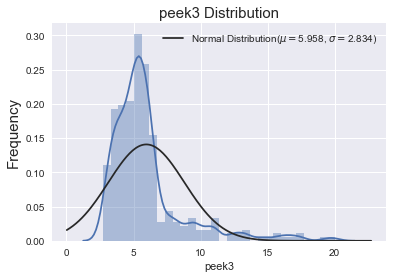

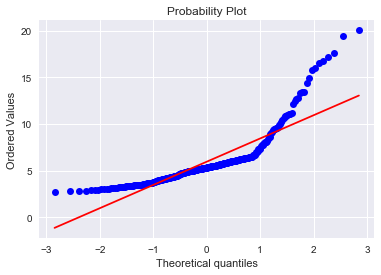

Skewness: 2.32524
Kurtosis: 6.40994


In [13]:
normalizing_feature('peek3')


mu(Mean): 6.163
sigma(Standard Deviation): 3.201
Mode: 0    5
dtype: int64


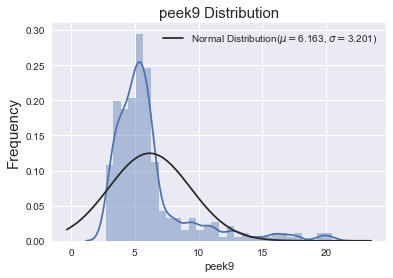

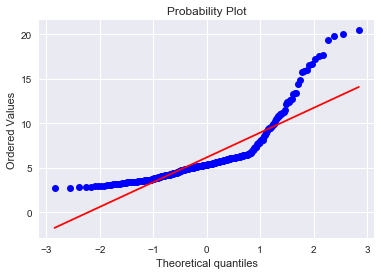

Skewness: 2.27329
Kurtosis: 5.62631


In [14]:
normalizing_feature('peek9')


mu(Mean): 5.535
sigma(Standard Deviation): 2.06
Mode: 0    5
dtype: int64


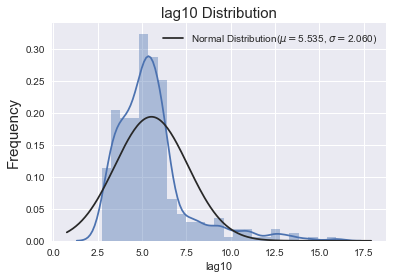

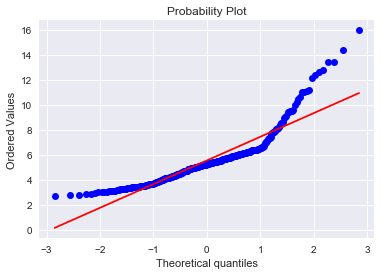

Skewness: 1.91502
Kurtosis: 5.01845


In [15]:
normalizing_feature('lag10')


mu(Mean): 6.186
sigma(Standard Deviation): 3.217
Mode: 0    5
dtype: int64


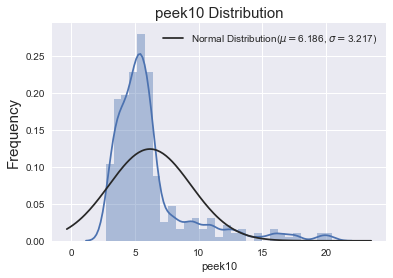

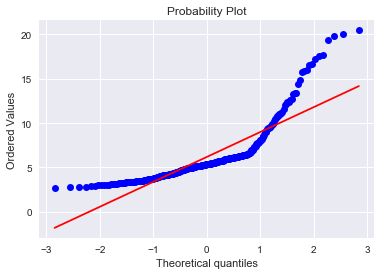

Skewness: 2.23763
Kurtosis: 5.42640


In [16]:
normalizing_feature('peek10')


mu(Mean): 5.495
sigma(Standard Deviation): 1.978
Mode: 0    5
dtype: int64


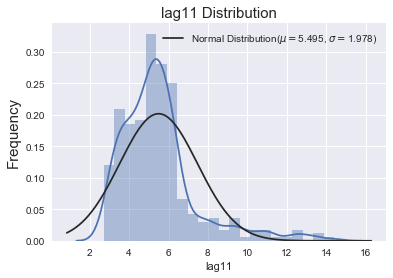

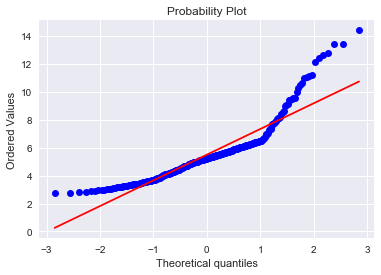

Skewness: 1.75058
Kurtosis: 4.08414


In [17]:
normalizing_feature('lag11')


mu(Mean): 6.215
sigma(Standard Deviation): 3.236
Mode: 0    5
dtype: int64


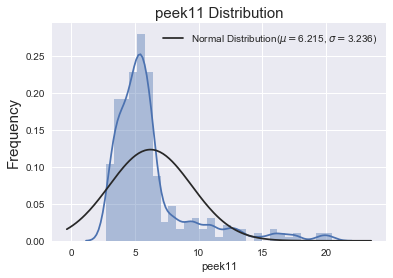

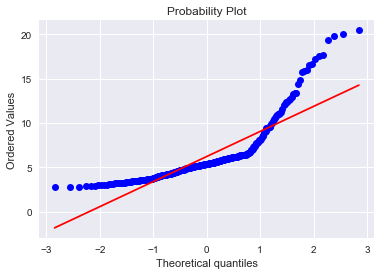

Skewness: 2.20028
Kurtosis: 5.20358


In [18]:
normalizing_feature('peek11')


mu(Mean): 5.459
sigma(Standard Deviation): 1.918
Mode: 0    5
dtype: int64


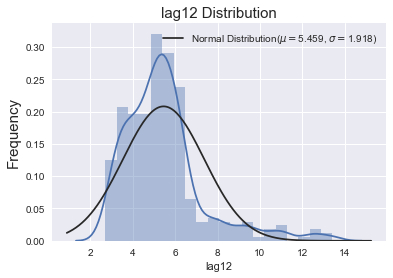

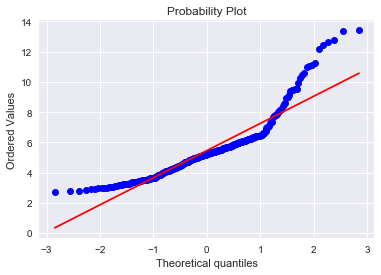

Skewness: 1.64965
Kurtosis: 3.64660


In [19]:
normalizing_feature('lag12')


mu(Mean): 6.26
sigma(Standard Deviation): 3.301
Mode: 0    5
dtype: int64


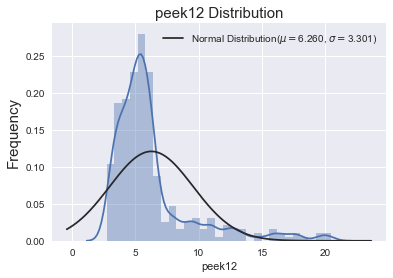

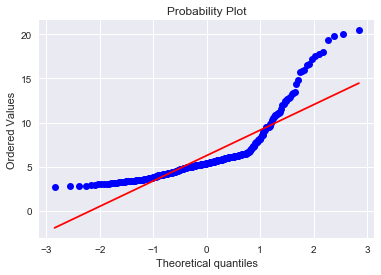

Skewness: 2.18016
Kurtosis: 4.98571


In [20]:
normalizing_feature('peek12')


mu(Mean): 2.372
sigma(Standard Deviation): 0.158
Mode: 0    2
1    2
2    2
3    2
dtype: int64


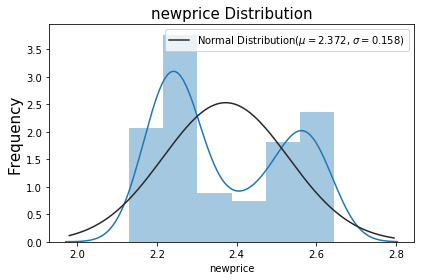

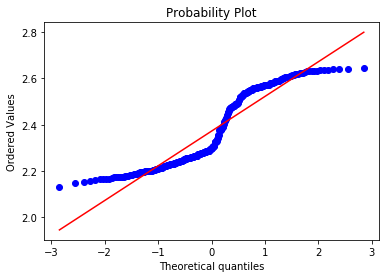

Skewness: 0.32430
Kurtosis: -1.48883


In [6]:
# Normalize 'Price'
data['newprice'] = np.log1p(data['Price'])
normalizing_feature('newprice')


mu(Mean): 1.865
sigma(Standard Deviation): 0.311
Mode: 0    1
dtype: int64


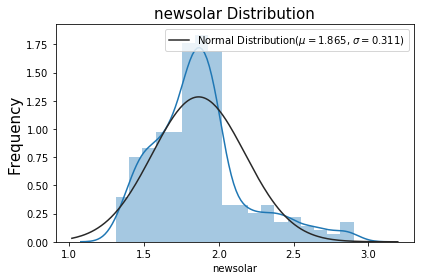

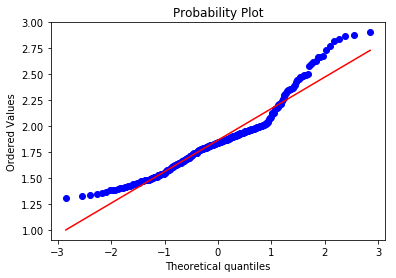

Skewness: 0.96711
Kurtosis: 1.22075


In [7]:
data['newsolar'] = np.log1p(data['Solar'])
normalizing_feature('newsolar')

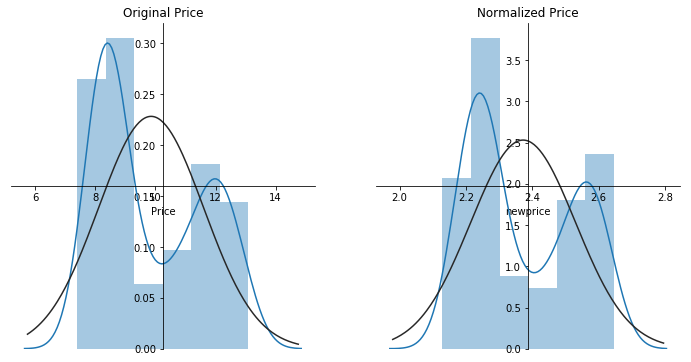

In [36]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Price")
axes2.set_title("Normalized Price")
#Price
# maxx = X_train["Price"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

plt.figure()

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

(mu, sigma) = scst.norm.fit(data['Price'])

sb.distplot(data['Price'] , fit=scst.norm, ax=axes1)



(mu, sigma) = scst.norm.fit(data['newprice'])

sb.distplot(data['newprice'] , fit=scst.norm, ax=axes2)

# Save our graph 
plt.tight_layout()
#plt.savefig("../../images/original_norm_Price.png")
figs = axes1.get_figure()
figs.savefig("../../images/original_norm_Price.png")
plt.show()


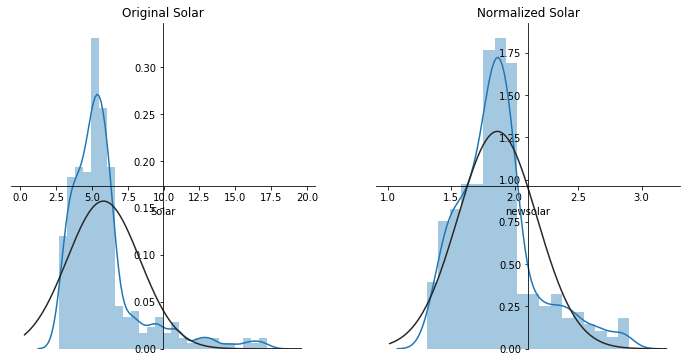

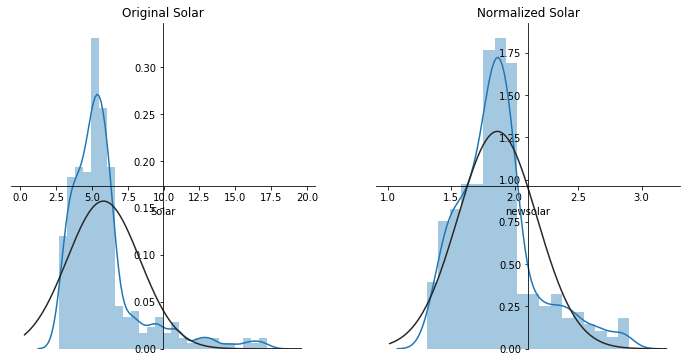

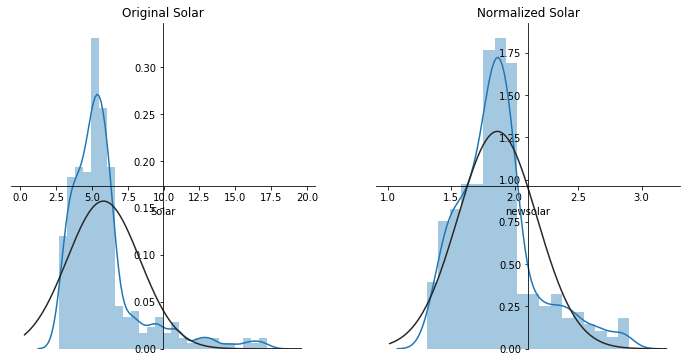

In [35]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Solar")
axes2.set_title("Normalized Solar")
#Price
# maxx = X_train["Price"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

plt.figure()

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

(mu, sigma) = scst.norm.fit(data['Solar'])

sb.distplot(data['Solar'] , fit=scst.norm, ax=axes1)



(mu, sigma) = scst.norm.fit(data['newsolar'])

snsplot = sb.distplot(data['newsolar'] , fit=scst.norm, ax=axes2)

# Save our graph 
plt.tight_layout()
#plt.savefig("../../images/original_norm_Solar.png")
figs = axes1.get_figure()
figs.savefig("../../images/original_norm_Solar.png")
plt.show()



mu(Mean): 41.135
sigma(Standard Deviation): 20.996
Mode: 0    0
dtype: int64


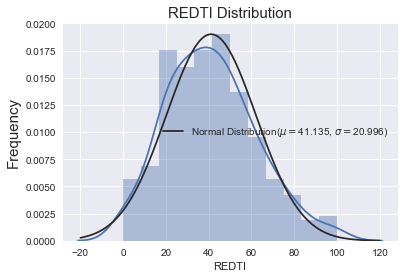

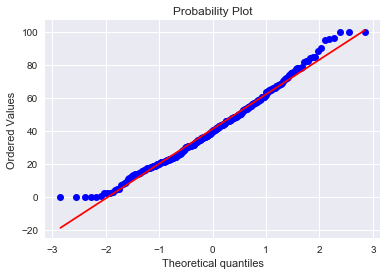

Skewness: 0.40195
Kurtosis: -0.06739


In [23]:
normalizing_feature('REDTI')

# Summary on feature distribution

* Solar: not normalized distribution
* Energy: not normalized distribution
* Price: binomial distribution
* REDTI: normal distribution but has a low correlation with other features

### We then proceed to attempt to fix the distribution by normalizing the above features


In [24]:
normalized_data = data.copy()

normalized_data['newenergy'] = np.log1p(data['Energy'])
normalized_data['newprice'] = np.log1p(data['Price'])
normalized_data['newsolar'] = np.log1p(data['Solar'])
# REDTI is a normal distribution already

normalized_data = normalized_data[["newsolar", "newenergy", "newprice", "year", "REDTI", "month_1", "month_2", "month_3", "month_4", 
                        "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12", 'lag1', 'peek1', 'lag2',
                        'peek2', 'lag3', 'peek3', 'lag4', 'peek4', 'lag5', 'peek5', 'lag6',
                        'peek6', 'lag7', 'peek7', 'lag8', 'peek8', 'lag9', 'peek9', 'lag10',
                        'peek10', 'lag11', 'peek11', 'lag12', 'peek12', 'diff1']]



### We verify if there are any changes in the correlation matrix on the newly normalized features

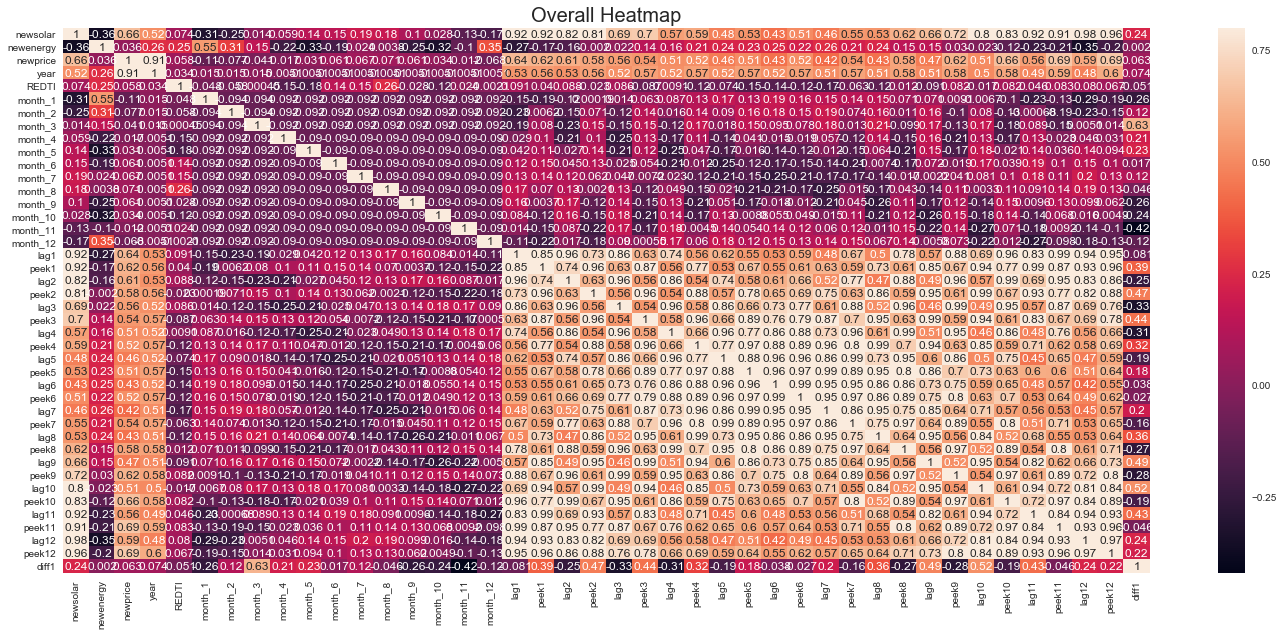

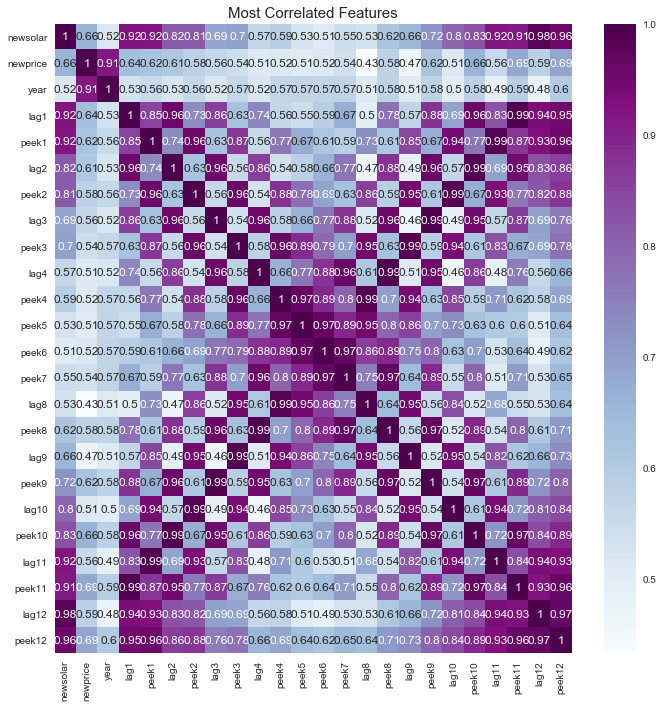

Most Correlated Features with Target Variable:

newprice
year
lag1
peek1
lag2
peek2
lag3
peek3
lag4
peek4
peek5
peek6
peek7
lag8
peek8
lag9
peek9
lag10
peek10
lag11
peek11
lag12
peek12


In [25]:
# Did feature correlation changed after normalization?
FeatureCorrelation(normalized_data, 'newsolar')

## No changes by creating the normalized version of the original features.  We reduce the dataset to the features with highest correlations


In [26]:
X = data[["year", "Price", "lag1", "peek1", "lag2", "peek2", "lag3", "peek3", 
         'lag4', 'peek4', 'lag5', 'peek5', 'lag6', 'peek6', 'lag7', 'peek7', 
          'lag8', 'peek8', 'lag9', 'peek9', 'lag10','peek10', 
          'lag11', 'peek11', 'lag12', 'peek12']]
         
X_normalized = normalized_data[["year", "newprice", "lag1", "peek1", 
                                "lag2", "peek2", "lag3", "peek3", 
                                'lag4', 'peek4', 'peek5', 'peek6', 'peek7', 
                                'lag8', 'peek8', 'lag9', 'peek9', 'lag10','peek10', 
                                'lag11', 'peek11', 'lag12', 'peek12']]
y = data["Solar"]#.values.reshape(-1, 1)
y_normalized = normalized_data["newsolar"]#.values.reshape(-1, 1)

print(X.shape, y.shape)
print(X.shape, y_normalized.shape)


(315, 26) (315,)
(315, 26) (315,)


In [29]:
OutX = os.path.join(output_data, "X.csv")
OutX_normalized = os.path.join(output_data, "X_normalized.csv")
Outy = os.path.join(output_data, "y.csv")
Outy_normalized = os.path.join(output_data, "y_normalized.csv")

X.to_csv(OutX, index=False)
X_normalized.to_csv(OutX_normalized, index=False)
y.to_csv(Outy, index=False, header=False)
y_normalized.to_csv(Outy_normalized, index=False)


In [28]:
y

12      3.058
13      3.296
14      4.542
15      5.006
16      5.526
17      5.576
18      5.853
19      5.793
20      5.283
21      4.815
22      3.950
23      3.749
24      3.168
25      3.415
26      4.705
27      5.185
28      5.724
29      5.776
30      6.063
31      6.000
32      5.473
33      4.988
34      4.092
35      3.884
36      3.257
37      3.511
38      4.837
39      5.332
40      5.886
41      5.939
        ...  
297     9.551
298     7.907
299     7.671
300     6.439
301     7.068
302     9.960
303    11.219
304    12.412
305    12.632
306    13.420
307    13.384
308    12.161
309    11.008
310     9.103
311     8.400
312     8.036
313     9.521
314    12.742
315    14.404
316    15.970
317    16.513
318    17.191
319    16.687
320    14.864
321    13.291
322    10.851
323     9.879
324     9.655
325    10.808
326    15.735
Name: Solar, Length: 315, dtype: float64